# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [20]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Pastikan resource nltk sudah di-download
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Inisialisasi Lemmatizer dan Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/marlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/marlee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/marlee/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [21]:
df = pd.read_csv("IMDB_raw.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [22]:
df.head()

,review,sentiment
0,After hearing about George Orwell's prophetic ...,negative
1,I'm not sure why Spike Lee made this train wre...,negative
2,"Medellin is a fabulous place to live, work, an...",negative
3,Woeful and unnecessary sequel to a bonafide cl...,negative
4,How much can you really say about a condom wit...,negative


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2000 non-null   object
 1   sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [24]:
df.describe()

,review,sentiment
count,2000,2000
unique,1999,2
top,Is there any other time period that has been s...,negative
freq,2,1000


In [25]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

sentiment
negative    1000
positive    1000
Name: count, dtype: int64


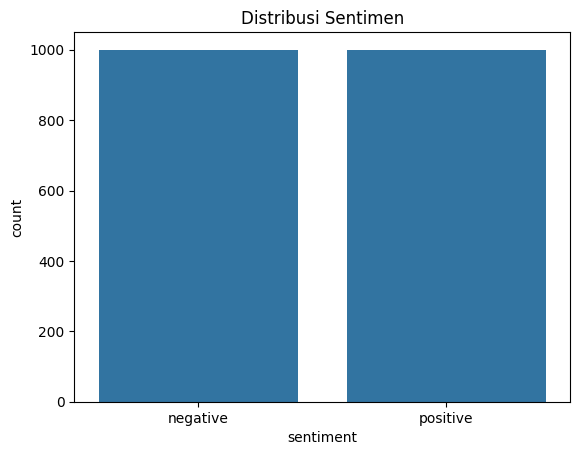

In [26]:
# Hitung jumlah tiap kelas
print(df['sentiment'].value_counts())

# Visualisasi distribusi
sns.countplot(x='sentiment', data=df)
plt.title("Distribusi Sentimen")
plt.show()

count    2000.000000
mean     1302.770500
std       963.530862
min       177.000000
25%       700.000000
50%       978.500000
75%      1573.750000
max      6103.000000
Name: review_length, dtype: float64


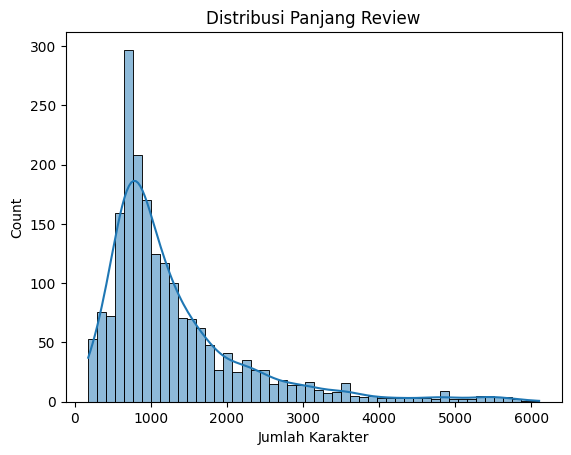

In [27]:
# Tambahkan kolom panjang review
df['review_length'] = df['review'].apply(len)

# Statistik panjang review
print(df['review_length'].describe())

# Visualisasi distribusi panjang review
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribusi Panjang Review")
plt.xlabel("Jumlah Karakter")
plt.show()

In [28]:
# Gabungkan semua review menjadi satu teks
all_text = " ".join(df['review'].tolist())

# Hapus tanda baca dan lowercase
all_text = re.sub(r"[^a-zA-Z\s]", "", all_text).lower()

# Hitung frekuensi kata
words = all_text.split()
word_counts = Counter(words)

# 20 kata paling sering
print(word_counts.most_common(20))

[('the', 26413), ('and', 12855), ('a', 12840), ('of', 11510), ('to', 10739), ('is', 8461), ('in', 7443), ('it', 6020), ('i', 5980), ('this', 5938), ('that', 5393), ('br', 4577), ('was', 3810), ('as', 3621), ('for', 3444), ('with', 3364), ('but', 3301), ('movie', 3262), ('film', 2940), ('on', 2601)]


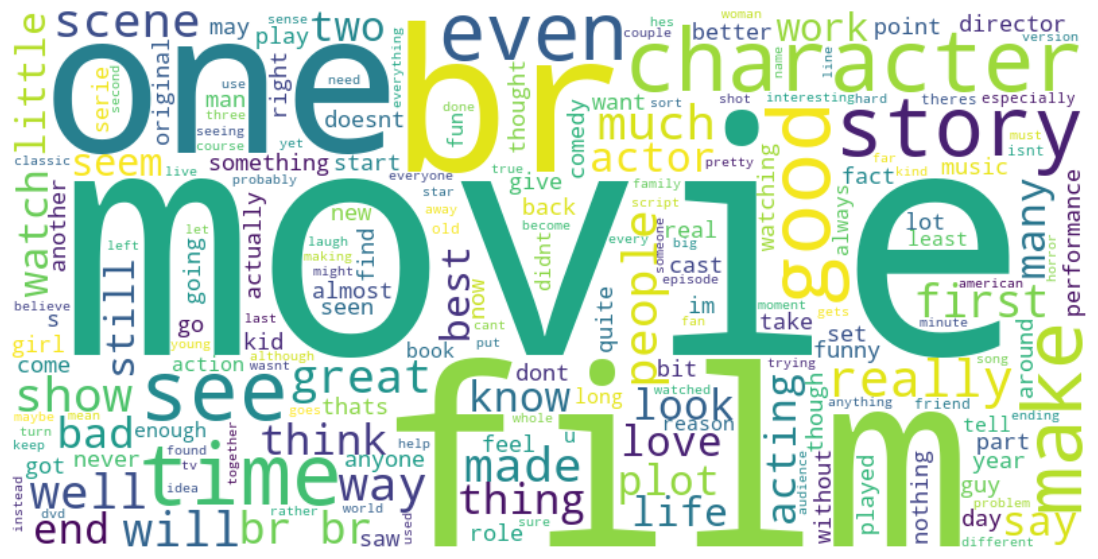

In [29]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [30]:
df = df.dropna(subset=['review', 'sentiment'])

In [31]:
df = df.drop_duplicates(subset=['review'])

Pembersihan Teks


In [32]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"<.*?>", " ", text)  # hapus HTML tags
    text = text.translate(str.maketrans("", "", string.punctuation))  # hapus tanda baca
    text = re.sub(r"\d+", "", text)  # hapus angka
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

df['clean_review'] = df['review'].apply(clean_text)

Tokenisasi Data

In [33]:
df['tokens'] = df['clean_review'].apply(word_tokenize)

Stopwords dan Lemmatization

In [34]:
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

df['lemmatized'] = df['tokens'].apply(lemmatize_tokens)

Label Encoder

In [35]:
le = LabelEncoder()
df['sentiment_label'] = le.fit_transform(df['sentiment'])

In [36]:
df[['review', 'clean_review', 'lemmatized', 'sentiment', 'sentiment_label']].head()

,review,clean_review,lemmatized,sentiment,sentiment_label
0,After hearing about George Orwell's prophetic ...,after hearing about george orwells prophetic m...,"[hearing, george, orwell, prophetic, masterpie...",negative,0
1,I'm not sure why Spike Lee made this train wre...,im not sure why spike lee made this train wrec...,"[im, sure, spike, lee, made, train, wreck, mov...",negative,0
2,"Medellin is a fabulous place to live, work, an...",medellin is a fabulous place to live work and ...,"[medellin, fabulous, place, live, work, study,...",negative,0
3,Woeful and unnecessary sequel to a bonafide cl...,woeful and unnecessary sequel to a bonafide cl...,"[woeful, unnecessary, sequel, bonafide, classi...",negative,0
4,How much can you really say about a condom wit...,how much can you really say about a condom wit...,"[much, really, say, condom, teeth, plot, reall...",negative,0


Menyimpan File Preprocessing

In [37]:
output_path = "IMDB_preprocessing.csv"
df.to_csv(output_path, index=False)